In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In this project we will answer the following questions:  
1) which series had more fans? Star trek or Star wars? 
2) Which movie in star wars series was most viewed? and which had the highest ranking? 
3) How many times did each character in star wars die? 
4) Which series had higher viewership,gender wise? 
5) Which gender accounted for higher viewership? 
6) How were the reposndents distributed geographically and educationally?



In [3]:
s_w=pd.read_csv("StarWars.csv")

In [4]:
s_w.shape

(1187, 38)

In [5]:
# drop all rows where respondent id in Nan
s_w=s_w[pd.notnull(s_w["RespondentID"])]
s_w.shape[0]

1186

In [6]:
s_w.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
s_w.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [8]:
# rename the cols by creating a dictionary.
col_dic={"Which of the following Star Wars films have you seen? Please select all that apply.":"seen-ep1","Unnamed: 4":"seen_ep2","Unnamed: 5":"seen_ep3","Unnamed: 6":"seen_4","Unnamed: 7":"seen_5","Unnamed: 8":"seen_6"}


In [9]:

s_w=s_w.rename(columns=col_dic)

In [10]:
s_w.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen-ep1,seen_ep2,seen_ep3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [11]:
s_w.iloc[:,3:9].head()

,seen-ep1,seen_ep2,seen_ep3,seen_4,seen_5,seen_6
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [497]:
seen_dict={"Star Wars: Episode I  The Phantom Menace":True,
           "Star Wars: Episode II  Attack of the Clones":True,
           "Star Wars: Episode III  Revenge of the Sith":True,
          "Star Wars: Episode IV  A New Hope":True,
          "Star Wars: Episode V The Empire Strikes Back":True,
          "Star Wars: Episode VI Return of the Jedi":True,
          np.nan:False}

In [498]:
for col in s_w.columns[3:9]:
    s_w[col]=s_w[col].map(seen_dict)

In [499]:
s_w.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen-ep1,seen_ep2,seen_ep3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [500]:
ser1=s_w[s_w.columns[3:9]].sum()
ser1

seen-ep1    673
seen_ep2    571
seen_ep3    550
seen_4      607
seen_5      758
seen_6      738
dtype: int64

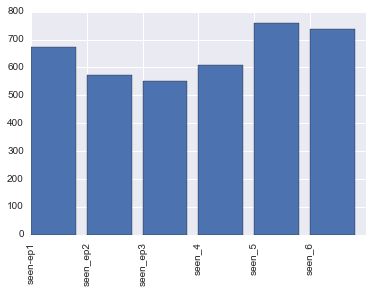

In [501]:
fig=plt.figure()
ax2=fig.add_subplot(1,1,1)
ax2.bar(range(6),ser1)
ax2.set_xticklabels(s_w.columns[3:9],rotation=90)

In [502]:
s_w.columns[9:15]

Index([u'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14'],
      dtype='object')

In [503]:
rank=["rank_ep1","rank_ep2","rank_ep3","rank_ep3","rank_ep4","rank_ep5"]
col_dict={}
for i,col in enumerate(s_w.columns[9:15]):
    col_dict[col]=rank[i]
col_dict

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_ep1',
 'Unnamed: 10': 'rank_ep2',
 'Unnamed: 11': 'rank_ep3',
 'Unnamed: 12': 'rank_ep3',
 'Unnamed: 13': 'rank_ep4',
 'Unnamed: 14': 'rank_ep5'}

In [504]:
s_w=s_w.rename(columns=col_dict)
s_w.iloc[:,9:15].head()

,rank_ep1,rank_ep2,rank_ep3,rank_ep3,rank_ep4,rank_ep5
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [13]:
s_w.iloc[:,9:15].astype(float).head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [506]:
ser2=s_w.iloc[:,9:15].astype("float").mean()
ser2

rank_ep1    3.732934
rank_ep2    4.087321
rank_ep3    4.341317
rank_ep3    3.272727
rank_ep4    2.513158
rank_ep5    3.047847
dtype: float64

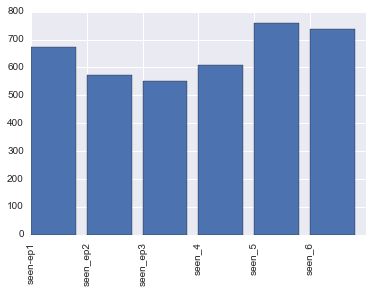

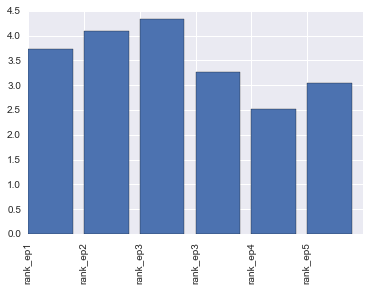

In [507]:
fig=plt.figure()
ax2=fig.add_subplot(1,
                    1,1)
ax2.bar(range(6),ser1)
ax2.set_xticklabels(s_w.columns[3:9],rotation=90)

fig =plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.bar(range(6),ser2)
ax1.set_xticklabels(s_w.columns[9:15],rotation=90)





It seems that the viewership was more  for the new movies and they were more liked(as higher the rank, lower the liking)


In [508]:
s_w.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen-ep1,seen_ep2,seen_ep3,seen_4,seen_5,seen_6,rank_ep1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [510]:
s_w_fan_star=s_w[s_w[s_w.columns[2]]=='Yes']

In [511]:
s_w_fan_star.shape[0]

552

In [512]:
s_w.shape[0]

1186

In [513]:
s_w.columns.get_loc("Do you consider yourself to be a fan of the Star Trek franchise?")

32

In [514]:
s_w_fan_trek=s_w[s_w[s_w.columns[32]]=="Yes"]

In [515]:
s_w_fan_trek.shape[0]

427

In [516]:
# There were more fans of star wars than star trek.


In [517]:
# Did more males like star wars than star trek?


In [518]:
s_w_fan_trek[s_w_fan_trek["Gender"]=="Male"].shape[0]

236

In [519]:
s_w_fan_star[s_w_fan_star["Gender"]=="Male"].shape[0]

303

In [520]:
# more men liked star wars.


In [521]:
# females like star wars or star trek more ?


In [281]:
s_w_fan_trek[s_w_fan_trek["Gender"]=="Female"].shape[0]

187

In [282]:
s_w_fan_star[s_w_fan_star["Gender"]=="Female"].shape[0]

238

In [283]:
# more females like star wars 


In [284]:
# lets split the s_w dataframe in males and females 


In [285]:
males=s_w[s_w['Gender']=='Female']
females=s_w[s_w["Gender"]=='Male']

In [286]:
males.shape[0]

549

In [287]:
females.shape[0]

497

In [288]:
s_w.shape[0]

1186

In [312]:
df=DataFrame([1186,497,549],index=["Total","females","males"],columns=["number of viewers"])

In [319]:
df["Number of star trek fans"]=[427,187,236]
df["Number of star wars fans"]=[552,238,236]
df

,number of viewers,Number of star trek fans,Number of star wars fans
Total,1186,427,552
females,497,187,238
males,549,236,236


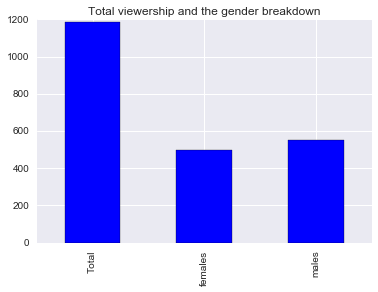

In [327]:
df["number of viewers"].plot(kind="bar")
plt.title("Total viewership and the gender breakdown")

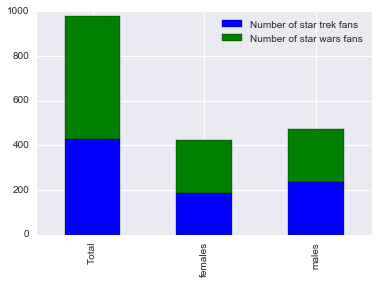

In [324]:
df.iloc[:,1:3].plot(kind="bar",stacked=True)

In [541]:
s_w["Which character shot first?"].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [542]:
shot_dict={"I don't understand this question":False,np.nan:False,"Han":"Han","Greedo":"Greedo"}


In [543]:
s_w["Which character shot first?"]=s_w["Which character shot first?"].map(shot_dict)

In [545]:
s_w["Which character shot first?"].value_counts()

False     664
Han       325
Greedo    197
Name: Which character shot first?, dtype: int64

The number of people who did not respond thsi question is very high. Howver,from the ones that did respond,the max voted for Han as the first character shot.


In [547]:
# How were the voters distributed educationally? and loactionally?
s_w['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

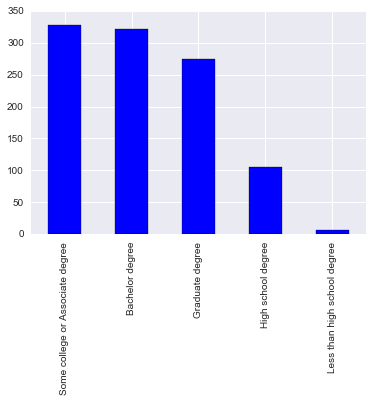

In [548]:
s_w['Education'].value_counts().plot(kind="bar")


The voters were high school graduates and above.

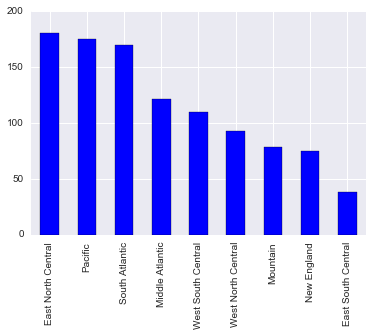

In [555]:
s_w["Location (Census Region)"].value_counts().plot(kind="bar")